In [16]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeBelemV2
from qiskit_aer.primitives import EstimatorV2
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from tqdm import trange
import numpy as np

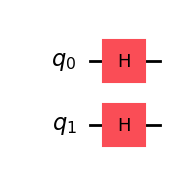

In [2]:
qc = QuantumCircuit(2)
qc.h(range(2))
qc.draw('mpl')

In [3]:
estimator = EstimatorV2() 

In [4]:
obs = SparsePauliOp(["IX", "XI"])

In [5]:
expected = estimator.run([(qc,obs)]).result()[0].data.evs

In [6]:
backend = FakeBelemV2()

In [7]:
est = Estimator(backend)

In [8]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

In [9]:
isa = pm.run(qc)
isa_obs = obs.apply_layout(isa.layout)

In [10]:
est.run([(isa,isa_obs)]).result()[0].data.evs

array(1.92675781)

In [15]:
tries = 1000
samples = 100
expected = 2.0

backend = FakeBelemV2()
estimator = Estimator(backend)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

qc = QuantumCircuit(2)
qc.h(range(2))


for current_try in trange(tries):

    isa = pm.run(qc)
    
    results = np.zeros(samples)
    for sample in range(samples):
        
        
        




100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 333410.49it/s]
